In [2]:
import pandas as pd

# Ruta del archivo csv
archivo_csv = 'C:\\Repo\\CE-Python\\Analisis de datos\\T3\\Ejercicios\\seguro.csv'

# Abrimos el csv para lectura
df = pd.read_csv(archivo_csv , encoding='utf-8')

# Mostramos las 5 primeras filas
df.head()

,Edad conductor,Experiencia conductor,Accidentes previos,Kilometraje anual,Fabricacion coche,Edad coche,Seguro Premium,Sexo
0,28,10,5,12,2022,3,499.80,Mujer
1,28,10,5,20,2025,0,499.90,Hombre
2,53,32,5,24,2023,2,488.70,Hombre
3,41,9,5,13,2013,12,498.45,Hombre
4,38,0,5,13,2017,8,501.35,Mujer


In [3]:
##############
# DATAFRAMES #
##############

# 1. Muestra cuántas columnas y filas existen en el dataset.
print(f"Filas: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")

Filas: 1000
Columnas: 8


In [4]:
# 2. Guarda los nombres de las columnas en una lista.
columnas = df.columns.tolist()
print(columnas)

['Edad conductor', 'Experiencia conductor', 'Accidentes previos', 'Kilometraje anual', 'Fabricacion coche', 'Edad coche', 'Seguro Premium ', 'Sexo']


In [5]:
# 3. Comprueba que no existe ningun null/nan en el dataset. En caso de existir, elimina las filas que contengan valores nulos

# Comprobar si existen valores nulos en el dataset
tiene_nulos = df.isnull().values.any()
print(f"¿Existen valores nulos? {tiene_nulos}")

# En caso de existir, eliminar filas con valores nulos
if tiene_nulos:
    df = df.dropna()
    print("Filas con valores nulos eliminadas.")
else:
    print("No se encontraron valores nulos.")

¿Existen valores nulos? False
No se encontraron valores nulos.


In [7]:
# 4. Añade una columna “Accidentado” que contenga valores “Si” o “No” según si la persona ha sufrido algún accidente.

# Ejemplo con columna "Accidentes" que indica número de accidentes
df['Accidentado'] = df['Accidentes previos'].apply(lambda x: 'Si' if x > 0 else 'No')

In [11]:
df.head()

,Edad conductor,Experiencia conductor,Accidentes previos,Kilometraje anual,Fabricacion coche,Edad coche,Seguro Premium,Sexo,Accidentado
0,28,10,5,12,2022,3,499.80,Mujer,Si
1,28,10,5,20,2025,0,499.90,Hombre,Si
2,53,32,5,24,2023,2,488.70,Hombre,Si
3,41,9,5,13,2013,12,498.45,Hombre,Si
4,38,0,5,13,2017,8,501.35,Mujer,Si


In [16]:
# 5. Crea el dataFrame df_virtuosos que contenga las filas donde Accidentes previos=0, excluyendo la columna de Accidentes Previos y la de Accidentado

# Filtrar filas donde 'Accidentes previos' sea igual a 0
df_virtuosos = df[df['Accidentes previos'] == 0].drop(columns=['Accidentes previos', 'Accidentado'])

# Mostrar las primeras filas del nuevo DataFrame (opcional)
print(df_virtuosos.head())

print(df_virtuosos.columns)

     Edad conductor  Experiencia conductor  Kilometraje anual  \
846              46                     19                 21   
847              25                      7                 13   
848              41                      1                 19   
849              19                      1                 16   
850              29                      8                 22   

     Fabricacion coche  Edad coche  Seguro Premium     Sexo  
846               2025           0           486.15  Hombre  
847               2005          20           495.55  Hombre  
848               2007          18           494.25  Hombre  
849               2010          15           498.20  Hombre  
850               2025           0           492.90   Mujer  
Index(['Edad conductor', 'Experiencia conductor', 'Kilometraje anual',
       'Fabricacion coche', 'Edad coche', 'Seguro Premium ', 'Sexo'],
      dtype='object')


In [18]:
# Asegurarse de eliminar espacios extra en el nombre de columna (buena práctica)
df_virtuosos = df_virtuosos.rename(columns={"Seguro Premium ": "Seguro Premium"})

# Reemplazar 0 años de experiencia por 1 para evitar división por cero
experiencia_ajustada = df_virtuosos["Experiencia conductor"].replace(0, 1)

# Calcular relación coste / experiencia
df_virtuosos["coste_por_experiencia"] = df_virtuosos["Seguro Premium"] / experiencia_ajustada

# Mostrar las primeras filas
print(df_virtuosos.head())

     Edad conductor  Experiencia conductor  Kilometraje anual  \
846              46                     19                 21   
847              25                      7                 13   
848              41                      1                 19   
849              19                      1                 16   
850              29                      8                 22   

     Fabricacion coche  Edad coche  Seguro Premium    Sexo  \
846               2025           0          486.15  Hombre   
847               2005          20          495.55  Hombre   
848               2007          18          494.25  Hombre   
849               2010          15          498.20  Hombre   
850               2025           0          492.90   Mujer   

     coste_por_experiencia  
846              25.586842  
847              70.792857  
848             494.250000  
849             498.200000  
850              61.612500  


In [19]:
# 7. Muestra el resumen estadístico del DataFrame original

print(df.describe())

       Edad conductor  Experiencia conductor  Accidentes previos  \
count     1000.000000            1000.000000           1000.0000   
mean        41.575000              14.759000              2.5680   
std         13.765677              10.544292              1.6989   
min         18.000000               0.000000              0.0000   
25%         30.000000               6.000000              1.0000   
50%         42.000000              13.000000              3.0000   
75%         53.000000              23.000000              4.0000   
max         65.000000              40.000000              5.0000   

       Kilometraje anual  Fabricacion coche   Edad coche  Seguro Premium   
count        1000.000000        1000.000000  1000.000000      1000.000000  
mean           17.933000        2007.637000    17.363000       493.742250  
std             4.410665          10.363331    10.363331         5.909689  
min            11.000000        1990.000000     0.000000       477.050000  
25%    

In [24]:
#############
# CONSULTAS #
#############

# 1. ¿Cuál es el porcentaje de accidentados y no accidentados en el dataset?

# Contar valores y calcular porcentaje
porcentajes = df['Accidentes previos'].value_counts(normalize=True) * 100

# Mostrar los resultados con formato legible
print(porcentajes)

3    18.5
4    17.6
1    17.1
5    17.0
0    15.4
2    14.4
Name: Accidentes previos, dtype: float64


In [26]:
# 2. ¿Cuál es la experiencia media por sexo y la total? Calcula la experiencia media de conducción para hombres y mujeres por separado, 
# así como el promedio general.

# Experiencia media por sexo
media_por_sexo = df.groupby("Sexo")["Experiencia conductor"].mean()

# Experiencia media total
media_total = df["Experiencia conductor"].mean()

print("Experiencia media en años por sexo:")
print(media_por_sexo)
print("\nExperiencia media en años total:")
print(media_total)

Experiencia media en años por sexo:
Sexo
Hombre    15.330693
Mujer     14.175758
Name: Experiencia conductor, dtype: float64

Experiencia media en años total:
14.759


In [28]:
# 3. ¿Cuál es la media y la desviación estándar del coste del seguro en función de la experiencia? Osea, media del precio con 1 año de carnet, 
# 2 años, etc... ¿Cuál de estas medias es mayor y cuál menor?

# Asegurar que el nombre de la columna esté limpio
df = df.rename(columns={"Seguro Premium ": "Seguro Premium"})

# Agrupar por años de experiencia y calcular media y desviación estándar del seguro
estadisticas = df.groupby("Experiencia conductor")["Seguro Premium"].agg(["mean", "std"]).reset_index()

# Renombrar columnas para mayor claridad (opcional)
estadisticas.columns = ["Experiencia conductor", "Media seguro", "Desviación estándar"]

# Mostrar el resultado
print(estadisticas)

# Encontrar los valores extremos
max_media = estadisticas.loc[estadisticas["Media seguro"].idxmax()]
min_media = estadisticas.loc[estadisticas["Media seguro"].idxmin()]

print("\nMayor media de seguro:")
print(max_media)

print("\nMenor media de seguro:")
print(min_media)

    Experiencia conductor  Media seguro  Desviación estándar
0                       0    500.691489             3.987444
1                       1    499.364130             4.298639
2                       2    499.993243             4.135469
3                       3    499.789062             3.466586
4                       4    498.645556             3.656436
5                       5    497.778049             4.000579
6                       6    497.753571             3.661029
7                       7    497.138462             3.684167
8                       8    495.868182             4.653591
9                       9    496.061290             3.381166
10                     10    495.222414             4.019097
11                     11    495.453659             3.197663
12                     12    494.643103             3.414719
13                     13    494.972727             3.342251
14                     14    494.222857             3.279131
15                     1

In [34]:
# 4. ¿Cómo se distribuyen los no accidentados por grupos de antigüedad del coche? (Edad en rangos: 0-9, 10-19, etc.)

import pandas as pd

# Filtrar y copiar para evitar el warning
no_accidentados = df[df['Accidentado'].str.strip() == 'No'].copy()

# Definir los rangos de antigüedad del coche
bins = range(0, no_accidentados['Edad coche'].max() + 10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]

# Clasificar en rangos de antigüedad
no_accidentados['Rango antigüedad coche'] = pd.cut(
    no_accidentados['Edad coche'],
    bins=bins,
    labels=labels,
    right=False
)

# Contar cuántos no accidentados hay en cada rango
distribucion = no_accidentados['Rango antigüedad coche'].value_counts().sort_index()

# Mostrar resultados
print(distribucion)


0-9      55
10-19    38
20-29    37
30-39    24
Name: Rango antigüedad coche, dtype: int64


In [36]:
# 5. ¿Cuál es la media de experiencia conduciendo en mujeres aseguradas con coches fabricados después del 2015?

# Filtrar mujeres con coches fabricados después de 2015
filtro = (df["Sexo"].str.strip() == "Mujer") & (df["Fabricacion coche"] > 2015)

# Calcular la media de experiencia en ese subconjunto
media_experiencia = df.loc[filtro, "Experiencia conductor"].mean()

print(f"Media de experiencia en mujeres aseguradas con coches fabricados después de 2015: {media_experiencia:.2f} años")

Media de experiencia en mujeres aseguradas con coches fabricados después de 2015: 13.69 años


In [38]:
# 6. ¿Qué porcentaje de conductores con más de 30 años son hombres?

# Filtrar conductores mayores de 30 años
mayores_30 = df[df["Edad conductor"] > 30]

# Calcular cuántos de ellos son hombres
num_hombres = mayores_30[mayores_30["Sexo"].str.strip() == "Hombre"].shape[0]

# Calcular total de conductores mayores de 30
total_mayores_30 = mayores_30.shape[0]

# Calcular porcentaje
porcentaje_hombres = (num_hombres / total_mayores_30) * 100

print(f"Porcentaje de conductores mayores de 30 años que son hombres: {porcentaje_hombres:.2f}%")


Porcentaje de conductores mayores de 30 años que son hombres: 50.88%


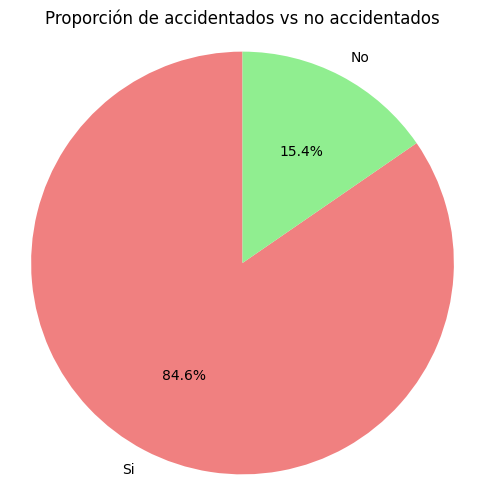

In [39]:
############
# GRÁFICOS #
############

# 1. Haz un gráfico de tartas con la proporción en el dataset entre accidentados y no accidentados.

import matplotlib.pyplot as plt

# Asegurar que no haya espacios en los valores de la columna
df["Accidentado"] = df["Accidentado"].str.strip()

# Contar accidentados y no accidentados
conteo = df["Accidentado"].value_counts()

# Crear gráfico de tarta
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title("Proporción de accidentados vs no accidentados")
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

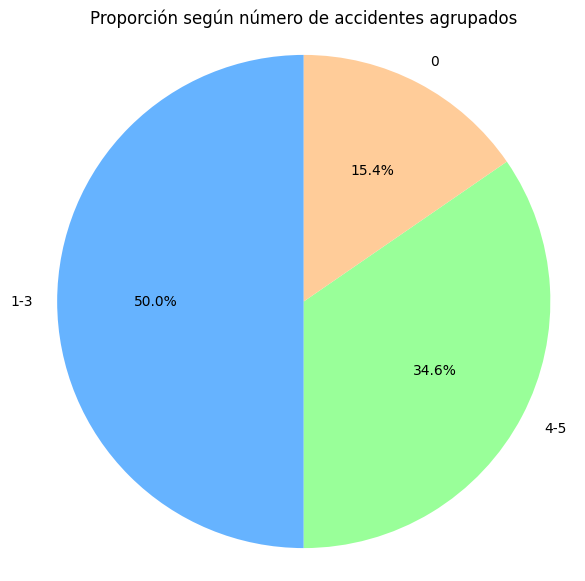

In [40]:
# 2. Gráfico de tartas con la proporción según número de accidentes agrupándolo por categorías (0, 1a3, 3a4, 5+).

import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que la columna de número de accidentes se llama 'Accidentes previos'
# Crear las categorías con pd.cut o con una función personalizada:

def categorizar_accidentes(x):
    if x == 0:
        return "0"
    elif 1 <= x <= 3:
        return "1-3"
    elif 4 <= x <= 4:
        return "3-4"  # este rango es un poco raro, porque 3-4 se sobrepone con 1-3, mejor lo ajustamos abajo
    else:
        return "5+"

# Mejor ajustamos correctamente el rango para evitar superposición:
def categorizar_accidentes(x):
    if x == 0:
        return "0"
    elif 1 <= x <= 3:
        return "1-3"
    elif 4 <= x <= 5:
        return "4-5"
    else:
        return "5+"

# Aplicar la función
df['Categoria accidentes'] = df['Accidentes previos'].apply(categorizar_accidentes)

# Contar proporciones
conteo_categorias = df['Categoria accidentes'].value_counts()

# Graficar tarta
plt.figure(figsize=(7,7))
plt.pie(conteo_categorias, labels=conteo_categorias.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff6666'])
plt.title("Proporción según número de accidentes agrupados")
plt.axis('equal')
plt.show()


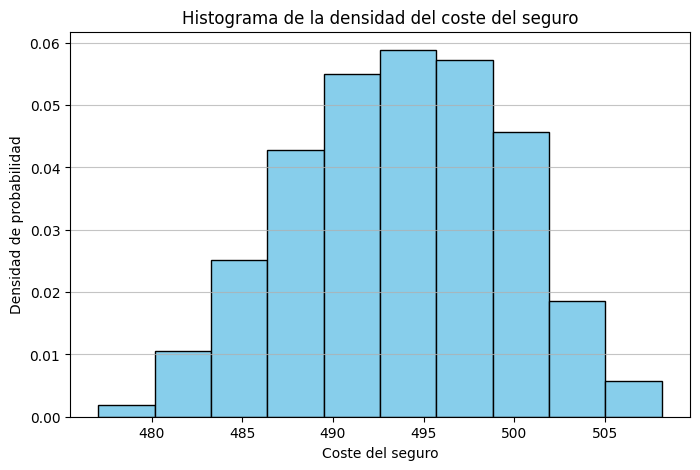

In [41]:
# 3. Haz un histograma con el coste del seguro, que muestre la densidad de la distribución de probabilidad, con 10 barras. Comenta lo que ves.

import matplotlib.pyplot as plt

# Renombrar para evitar problemas con espacios
df = df.rename(columns={"Seguro Premium ": "Seguro Premium"})

plt.figure(figsize=(8,5))
plt.hist(df["Seguro Premium"], bins=10, density=True, color='skyblue', edgecolor='black')
plt.title("Histograma de la densidad del coste del seguro")
plt.xlabel("Coste del seguro")
plt.ylabel("Densidad de probabilidad")
plt.grid(axis='y', alpha=0.75)
plt.show()


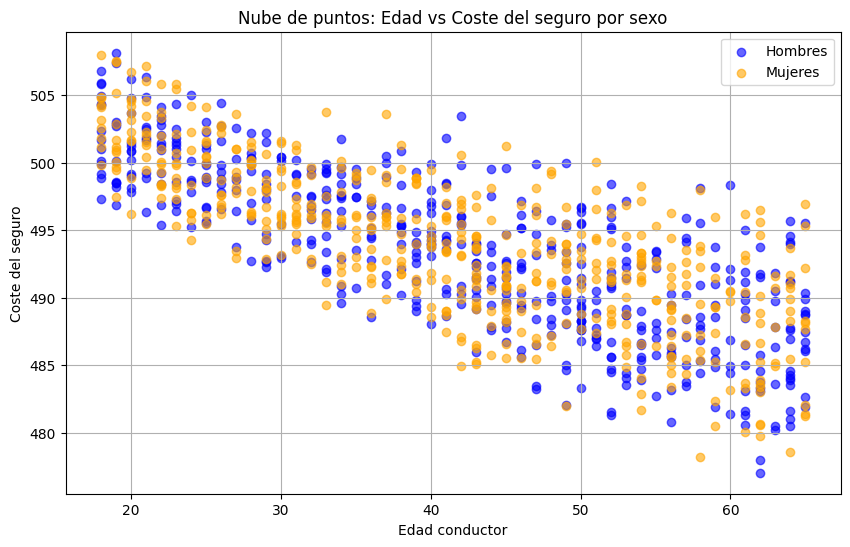

In [43]:
# 4. Haz una nube de puntos con la edad en el eje x y los costes en el eje y, separando en 2 colores diferentes hombres/mujeres. Comenta lo que ves.

import matplotlib.pyplot as plt

# Renombrar columnas para evitar problemas con espacios
df = df.rename(columns={"Seguro Premium ": "Seguro Premium"})

# Limpiar posibles espacios en 'Sexo'
df['Sexo'] = df['Sexo'].str.strip()

# Crear el scatter plot
plt.figure(figsize=(10,6))

# Filtrar por sexo para colores distintos
hombres = df[df['Sexo'] == 'Hombre']
mujeres = df[df['Sexo'] == 'Mujer']

plt.scatter(hombres['Edad conductor'], hombres['Seguro Premium'], color='blue', alpha=0.6, label='Hombres')
plt.scatter(mujeres['Edad conductor'], mujeres['Seguro Premium'], color='orange', alpha=0.6, label='Mujeres')

plt.title("Nube de puntos: Edad vs Coste del seguro por sexo")
plt.xlabel("Edad conductor")
plt.ylabel("Coste del seguro")
plt.legend()
plt.grid(True)
plt.show()


In [45]:
###########################
# CONVERSION DE VARIABLES #
###########################

# Crear copia del dataset
data_num = df.copy()

# Limpiar espacios en las columnas relevantes
data_num['Accidentado'] = data_num['Accidentado'].str.strip()
data_num['Sexo'] = data_num['Sexo'].str.strip()

# Mapear valores categóricos a numéricos
data_num['Accidentado'] = data_num['Accidentado'].map({'Si': 1, 'No': 0})
data_num['Sexo'] = data_num['Sexo'].map({'Hombre': 1, 'Mujer': 0})

# Comprobar resultados
print(data_num[['Accidentado', 'Sexo']].head())

   Accidentado  Sexo
0            1     0
1            1     1
2            1     1
3            1     1
4            1     0
